In [2]:
# %matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Parte 1

### 1.- Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [3]:
def cromaticas(img):
    '''
    Devuelve la imagen original aplicando el algoritmo para 
    pasar a coordenadas cromáticas normalizado a la suma de
    intensidades de los canales
    Hay que hacer algo para cuando la suma de las intensidades en
    los canales da 0
    '''

    # calculo el denominador (suma de todos los canales)
    imagen = img.astype(int)
    suma = (imagen[:,:,0] + imagen[:,:,1] + imagen[:,:,2])
    # Cuando la suma es 0. Lo convierto a 1 para poder dividir.
    mask = suma == 0
    suma = suma + mask
    result = np.zeros(img.shape)
    for i in range(3):
        result[:,:,i] = np.round(imagen[:,:,i] * imagen[:,:,i] / suma)
        result = result.astype('uint8')
    return result

### 2.- Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [4]:
def white_patch(img):
    '''
    Devuelve la imagen original aplicando el algoritmo White Patch
    Normalizado al color de la luz blanca puro (255, 255, 255)
    '''
    result = np.zeros(img.shape)
    for i in range(3):
        result[:,:,i] = np.round(255/img[:,:,i].max()*img[:,:,i])
        result = result.astype('uint8')
    return result

### 3.- Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

Primero defino una función para graficar las la imagen original y 4 variaciones que corresponden a:
- aplicando cromaticas
- aplicando white-patch
- combinando ambos (primero cromaticas)
- combinando ambos (primero white-patch)

In [5]:
def plotear(imagen):

    '''
    Funcion para generar ploteos varios
    de una imagen y sus derivadas al 
    ser procesadas
    '''
    # Cargar una imagen
    img = cv.imread(imagen, cv.IMREAD_COLOR)
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # Muestro las imagenes

    # original
    ax1=plt.subplot(311)
    ax1.imshow(imgRGB,  vmin=0, vmax=255)
    ax1.set_title('Original')

    # aplicando cromaticas
    ax1=plt.subplot(324)
    ax1.imshow(cromaticas(imgRGB),  vmin=0, vmax=255)
    ax1.set_title('cromaticas')

    # Aplicando White Patch
    ax1=plt.subplot(323)
    ax1.imshow(white_patch(imgRGB),  vmin=0, vmax=255)
    ax1.set_title('white-patch')

    # Aplicando White-Patch luego cromaticas
    ax1=plt.subplot(326)
    ax1.imshow(cromaticas(white_patch(imgRGB)),  vmin=0, vmax=255)
    ax1.set_title('white-patch+Cromaticas')

    # Aplicando cromáticas luego White-Patch
    ax1=plt.subplot(325)
    ax1.imshow(white_patch(cromaticas(imgRGB)),  vmin=0, vmax=255)
    ax1.set_title('Cromaticas+white-patch')

    plt.plot()


Ahora pruebo para todas las imágenes tanto de la carpeta de cromáticas como de white-patch

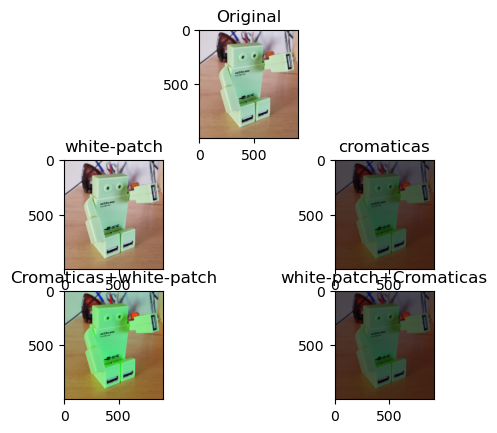

In [6]:
plotear('coord_cromaticas/coordCrom_1.png')

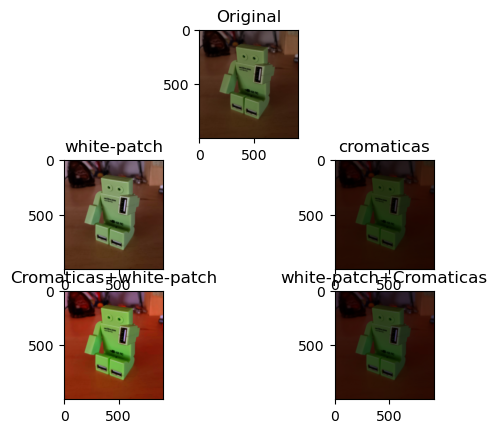

In [7]:
plotear('coord_cromaticas/coordCrom_2.png')

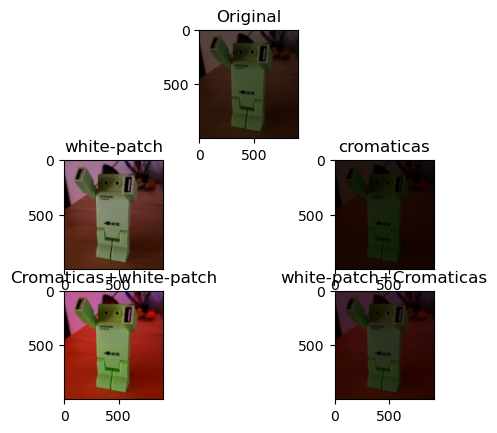

In [8]:
plotear('coord_cromaticas/coordCrom_3.png')

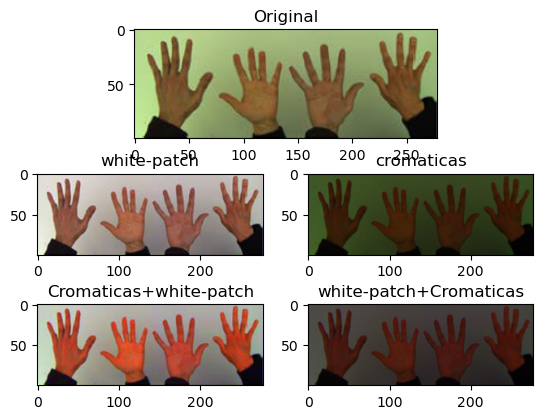

In [9]:
plotear('white_patch/test_green.png')

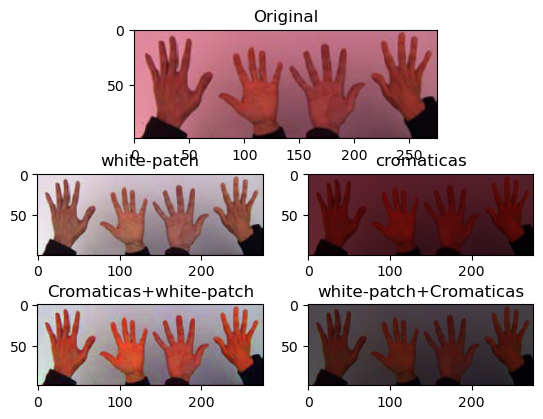

In [10]:
plotear('white_patch/test_red.png')

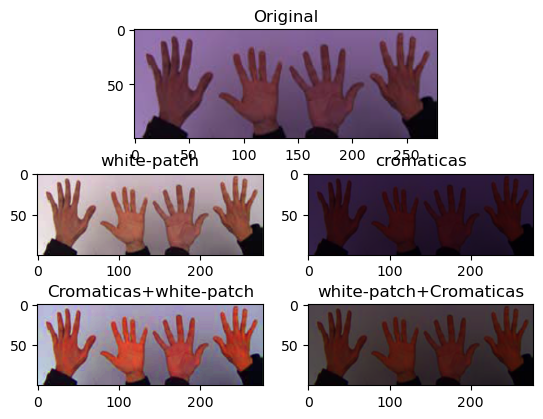

In [11]:
plotear('white_patch/test_blue.png')

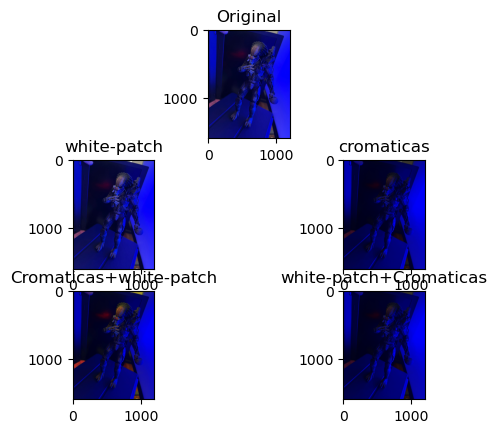

In [12]:
plotear('white_patch/wp_blue.jpg')

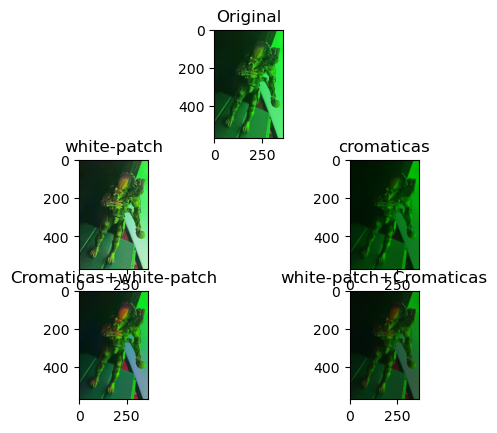

In [13]:
plotear('white_patch/wp_green.png')

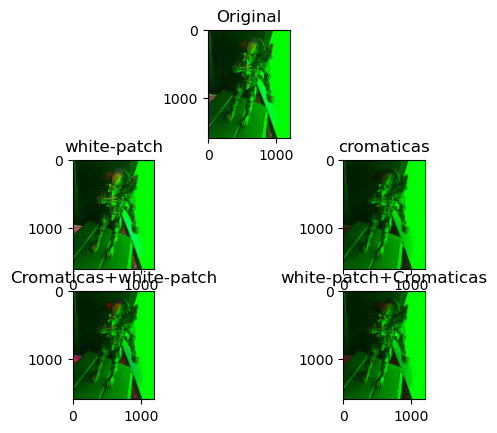

In [14]:
plotear('white_patch/wp_green2.jpg')

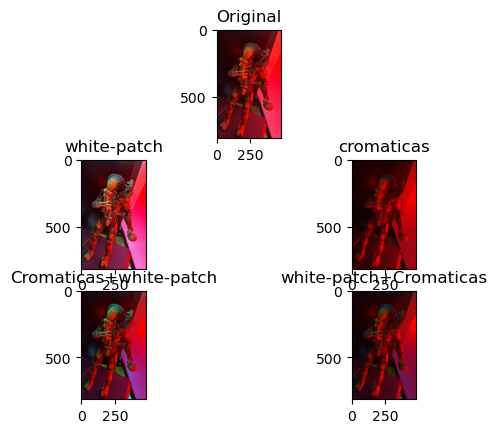

In [15]:
plotear('white_patch/wp_red.png')

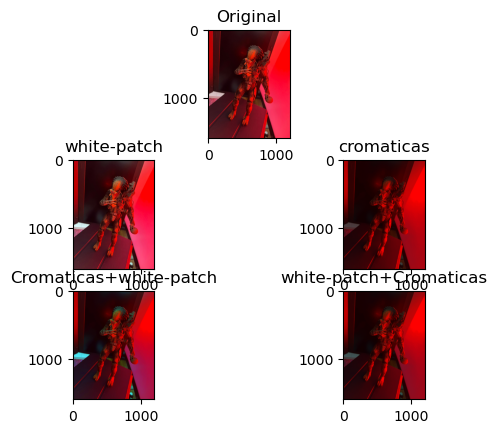

In [16]:
plotear('white_patch/wp_red2.jpg')

## Parte 2

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

In [17]:
# Cargar una imagen
imagen = 'img1_tp.png'
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
#imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)



Text(0.5, 1.0, 'img2')

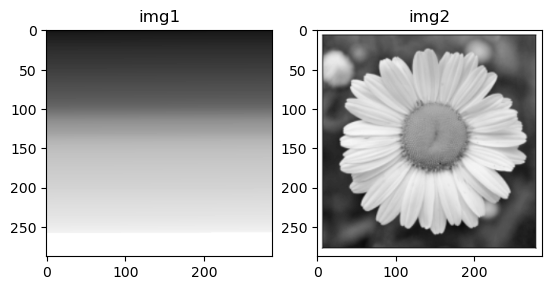

In [18]:
# Muestro las imagenes
ax1=plt.subplot(121)
ax1.imshow(img1,  vmin=0, vmax=255, cmap='gray')
ax1.set_title('img1')
ax1=plt.subplot(122)
ax1.imshow(img2,  vmin=0, vmax=255, cmap='gray')
ax1.set_title('img2')


### Inciso 2
Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa,\
si tuviera que entrenar un modelo de clasificación/detección de imágenes,considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

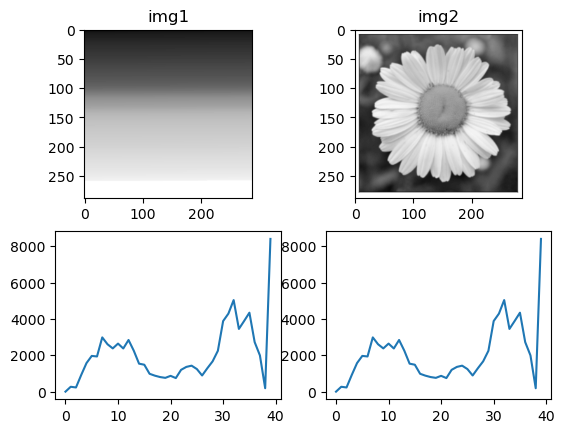

In [19]:
bins = 40
hist1,bins1 = np.histogram(img1.ravel(),bins,[0,256])
hist2,bins2 = np.histogram(img2.ravel(),bins,[0,256])

# Muestro las imagenes con los histogramas
ax1=plt.subplot(221)
ax1.imshow(img1,  vmin=0, vmax=255, cmap='gray')
ax1.set_title('img1')
ax1=plt.subplot(222)
ax1.imshow(img2,  vmin=0, vmax=255, cmap='gray')
ax1.set_title('img2')
ax1=plt.subplot(223)
ax1.plot(hist1)
ax1=plt.subplot(224)
ax1.plot(hist2)

Los histogramas son muy parecidos. Prácticamente idénticos. Considero que no serían útilies como features para clasificar este tipo de imágenes.
Se observan histogramas suaves y continuos. Además se ve que se limita el valor máximo a 40, con una gran acumulación de píxeles en ese valor. Probablemente se haya implementado operación que bajó el contraste y completó el rango dinnámico en ese rango.

### Inciso 3
Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) \
y muestre, aplicando mascaras, las regiones en imágenes separadas.

Text(0.5, 1.0, 'Original')

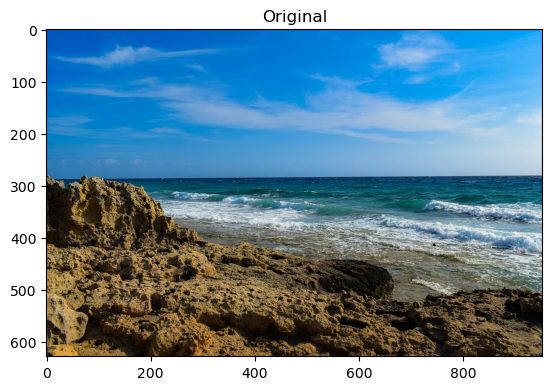

In [20]:
# Cargar una imagen
img = cv.imread('segmentacion.png', cv.IMREAD_COLOR)
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Muestro la imagenes
ax1=plt.subplot(111)
ax1.imshow(imgRGB,  vmin=0, vmax=255)
ax1.set_title('Original')

In [21]:
canal1 = imgRGB[:,:,0]
canal2 = imgRGB[:,:,1]
canal3 = imgRGB[:,:,2]

Text(0.5, 1.0, 'canal3')

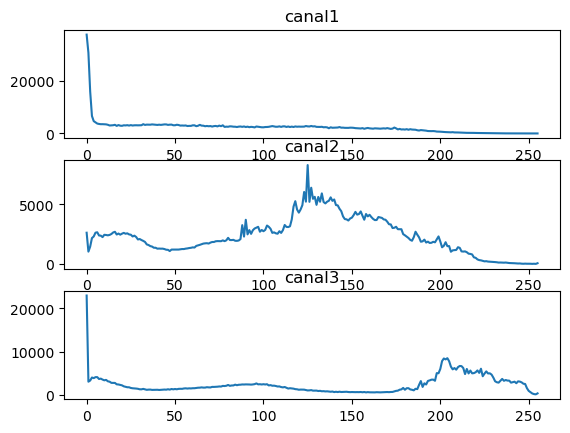

In [22]:
bins = 256
hist1,bins1 = np.histogram(canal1.ravel(),bins,[0,256])
hist2,bins2 = np.histogram(canal2.ravel(),bins,[0,256])
hist3,bins3 = np.histogram(canal3.ravel(),bins,[0,256])

ax1=plt.subplot(311)
ax1.plot(hist1)
ax1.set_title('canal1')
ax1=plt.subplot(312)
ax1.plot(hist2)
ax1.set_title('canal2')
ax1=plt.subplot(313)
ax1.plot(hist3)
ax1.set_title('canal3')

Se observa que cada canal tiene un modo que se corresponde con cielo, tierra y agua

Text(0.5, 1.0, 'canal3_HSV')

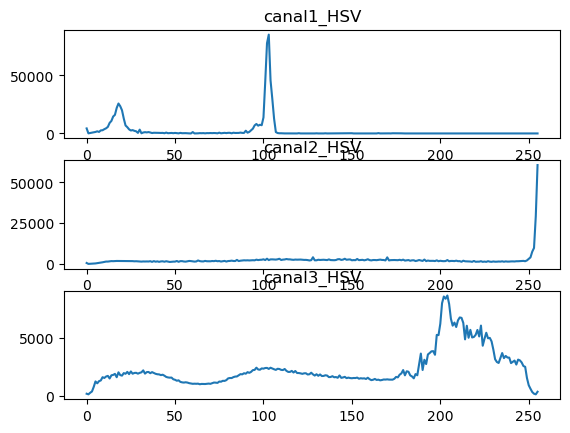

In [32]:
imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)

canal1_hsv = imgHSV[:,:,0]
canal2_hsv = imgHSV[:,:,1]
canal3_hsv = imgHSV[:,:,2]
hist1_hsv,bins_hsv1 = np.histogram(canal1_hsv.ravel(),bins,[0,256])
hist2_hsv,bins_hsv2 = np.histogram(canal2_hsv.ravel(),bins,[0,256])
hist3_hsv,bins_hsv2 = np.histogram(canal3_hsv.ravel(),bins,[0,256])

ax1=plt.subplot(311)
ax1.plot(hist1_hsv)
ax1.set_title('canal1_HSV')
ax1=plt.subplot(312)
ax1.plot(hist2_hsv)
ax1.set_title('canal2_HSV')
ax1=plt.subplot(313)
ax1.plot(hist3_hsv)
ax1.set_title('canal3_HSV')

Hago una segmentación con 3 métodos:
- 1) Por canales RGB con umbral fijo
- 2) Por canales HSV umbral fijo
- 3) Tomo una muestra de cada zona y mediante un descriptor estadístico genero las máscaras

In [34]:
# Funcion de binarización (a mano)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

Text(0.5, 1.0, 'Cielo')

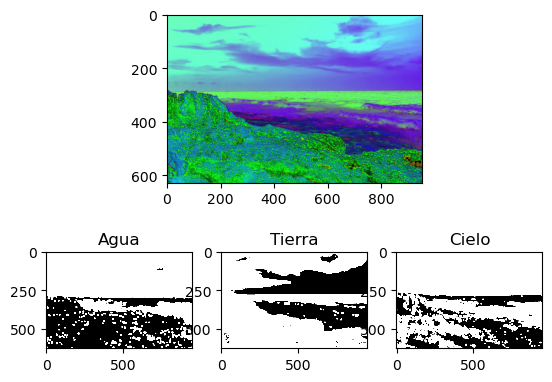

In [40]:
# Segmentacion canales HSV
ax1=plt.subplot(211)
ax1.imshow(imgHSV, vmin=0, vmax=1)
ax1=plt.subplot(234)

img_bin = global_threshold(canal1_hsv, 100, 255, 0)
ax1.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax1.set_title('Agua')

ax1=plt.subplot(235)
img_bin = global_threshold(canal2_hsv, 180, 255, 0)
ax1.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax1.set_title('Tierra')

ax1=plt.subplot(236)
img_bin = global_threshold(canal3_hsv, 180, 255, 0)
ax1.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax1.set_title('Cielo')

Text(0.5, 1.0, 'Cielo')

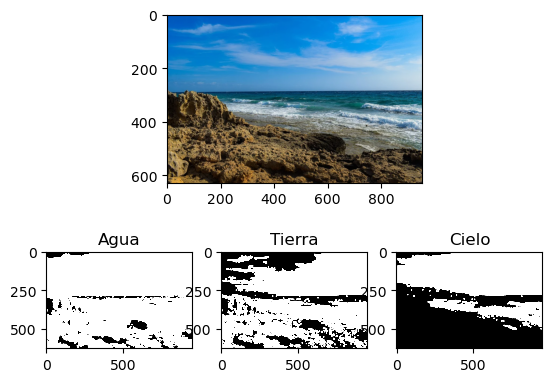

In [76]:
# Segmentacion canales RGB
ax1=plt.subplot(211)
ax1.imshow(imgRGB, vmin=0, vmax=1)

ax1=plt.subplot(234)
img_bin = global_threshold(canal2, 100, 255, 0)
ax1.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax1.set_title('Agua')

ax1=plt.subplot(235)
img_bin = global_threshold(canal2, 140, 255, 0)
ax1.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax1.set_title('Tierra')

ax1=plt.subplot(236)
img_bin = global_threshold(canal3, 200, 255, 0)
ax1.imshow(img_bin,cmap='gray', vmin=0, vmax=1)
ax1.set_title('Cielo')

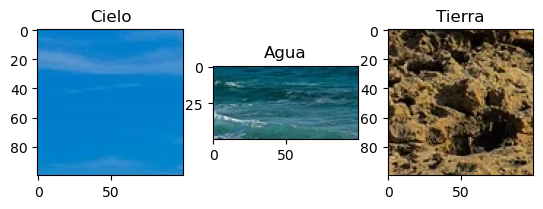

-1

In [59]:
# Segmentacío con descriptor estadístico
# Tomamos una muestra cielo, agua y tierra
img_muestra_cielo = imgRGB[100:200, 100:200,:]
img_muestra_agua = imgRGB[300:350, 500:600,:]
img_muestra_tierra = imgRGB[400:500, 200:300,:]


ax1=plt.subplot(234)
ax1.imshow(img_muestra_cielo)
ax1.set_title('Cielo')

ax1=plt.subplot(235)
ax1.imshow(img_muestra_agua)
ax1.set_title('Agua')

ax1=plt.subplot(236)
ax1.imshow(img_muestra_tierra)
ax1.set_title('Tierra')
plt.show()

cv.waitKey(0)

In [61]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean_cielo, color_std_cielo = cv.meanStdDev(img_muestra_cielo)
color_mean_agua, color_std_agua = cv.meanStdDev(img_muestra_agua)
color_mean_tierra, color_std_tierra = cv.meanStdDev(img_muestra_tierra)


[]

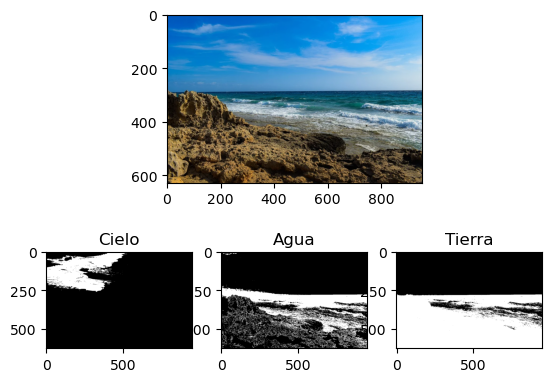

In [65]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask_cielo  = cv.inRange(imgRGB, color_mean_cielo-color_std_cielo * n_sigma,  color_mean_cielo+color_std_cielo * n_sigma)
mask_agua   = cv.inRange(imgRGB, color_mean_agua-color_std_agua * n_sigma,  color_mean_agua+color_std_agua * n_sigma)
mask_tierra = cv.inRange(imgRGB, color_mean_tierra-color_std_tierra * n_sigma,  color_mean_tierra+color_std_tierra * n_sigma)
img_segmentada_cielo = cv.bitwise_and(imgRGB, imgRGB, mask=mask_cielo)
img_segmentada_agua = cv.bitwise_and(imgRGB, imgRGB, mask=mask_agua)
img_segmentada_tierra = cv.bitwise_and(imgRGB, imgRGB, mask=mask_tierra)

ax1=plt.subplot(211)
ax1.imshow(imgRGB, vmin=0, vmax=1)

ax1=plt.subplot(234)
ax1.imshow(mask_cielo, cmap='gray')
ax1.set_title('Cielo')
ax1.plot()

ax1=plt.subplot(235)
ax1.imshow(mask_agua, cmap='gray')
ax1.set_title('Agua')
ax1.plot()

ax1=plt.subplot(236)
ax1.imshow(mask_tierra, cmap='gray')
ax1.set_title('Tierra')
ax1.plot()